In [40]:
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
import matplotlib.pyplot as plt

In [29]:
features  = np.array([[ 1.9,2.3],
                   [ 1.5,2.5],
                   [ 0.8,0.6],
                   [ 0.4,1.8],
                   [ 0.1,0.1],
                   [ 0.2,1.8],
                   [ 2.0,0.5],
                   [ 0.3,1.5],
                   [ 1.0,1.0]])

In [30]:
whitened = whiten(features)

In [31]:
whitened

array([[2.73959671, 2.91001406],
       [2.16283951, 3.16305876],
       [1.15351441, 0.7591341 ],
       [0.5767572 , 2.27740231],
       [0.1441893 , 0.12652235],
       [0.2883786 , 2.27740231],
       [2.88378601, 0.63261175],
       [0.4325679 , 1.89783526],
       [1.44189301, 1.2652235 ]])

In [32]:
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)

book

array([[2.73959671, 2.91001406],
       [1.15351441, 0.7591341 ]])

In [33]:
codes = 3
kmeans(whitened,codes)

(array([[1.40584568, 0.69587293],
        [0.4325679 , 2.15087996],
        [2.45121811, 3.03653641]]), 0.5511808116483707)

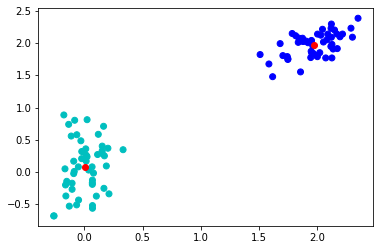

In [41]:
pts = 50
rng = np.random.default_rng()
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], 
                            size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
features = np.concatenate((a, b))

whitened = whiten(features)

codebook, distortion = kmeans2(whitened, 2)

clusters = vq(whitened, codebook)[0]
color_map = {0: "c", 1: "b"}


colors_fn = np.vectorize(lambda x: color_map[x])
colors = colors_fn(clusters)
plt.scatter(whitened[:, 0], whitened[:, 1], c=colors)
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

C:\Users\Thanh\.conda\envs\tensorflow2_gpu_p36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


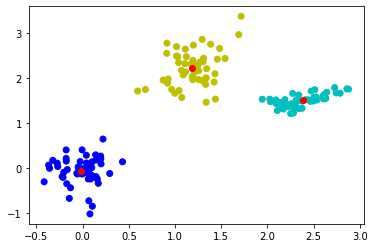

In [44]:
pts = 50
rng = np.random.default_rng()
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], 
                            size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
c = rng.multivariate_normal([15, 15],
                            [[5, 8], [10, 3]],
                            size=pts)
features = np.concatenate((a, b, c))

whitened = whiten(features)

codebook, distortion = kmeans2(whitened, 3)

clusters = vq(whitened, codebook)[0]
color_map = {0: "c", 1: "b", 2: "y"}


colors_fn = np.vectorize(lambda x: color_map[x])
colors = colors_fn(clusters)
plt.scatter(whitened[:, 0], whitened[:, 1], c=colors)
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

In [45]:
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist

In [61]:
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], 
                            size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
c = rng.multivariate_normal([15, 15],
                            [[5, 8], [10, 3]],
                            size=pts)
X = np.concatenate((a, b, c))

C:\Users\Thanh\.conda\envs\tensorflow2_gpu_p36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


In [62]:
Z = ward(pdist(X))

In [63]:
Z

array([[5.70000000e+01, 5.80000000e+01, 5.86717517e-02, 2.00000000e+00],
       [6.30000000e+01, 8.90000000e+01, 8.77616006e-02, 2.00000000e+00],
       [2.00000000e+00, 4.90000000e+01, 1.11016342e-01, 2.00000000e+00],
       [5.50000000e+01, 6.00000000e+01, 1.12286450e-01, 2.00000000e+00],
       [6.60000000e+01, 9.40000000e+01, 1.63227973e-01, 2.00000000e+00],
       [7.20000000e+01, 8.20000000e+01, 1.63583898e-01, 2.00000000e+00],
       [7.00000000e+01, 8.40000000e+01, 1.81176473e-01, 2.00000000e+00],
       [1.12000000e+02, 1.16000000e+02, 2.03038850e-01, 2.00000000e+00],
       [1.32000000e+02, 1.38000000e+02, 2.33115744e-01, 2.00000000e+00],
       [1.90000000e+01, 2.70000000e+01, 2.56234975e-01, 2.00000000e+00],
       [1.80000000e+01, 2.20000000e+01, 2.58198373e-01, 2.00000000e+00],
       [1.11000000e+02, 1.30000000e+02, 2.64925102e-01, 2.00000000e+00],
       [1.40000000e+01, 1.70000000e+01, 2.91164489e-01, 2.00000000e+00],
       [4.40000000e+01, 1.52000000e+02, 3.01194900e

In [64]:
fcluster(Z, t=0.9, criterion='distance')

array([25, 24,  3,  6, 15,  7,  3, 18,  9, 14,  9, 22,  1,  7, 17, 10, 16,
       17, 10,  4, 11, 18, 10, 17, 20, 15, 26,  4, 18,  2,  9,  8, 21, 12,
       23, 24, 13, 11,  6,  8, 15,  5, 12, 19,  3,  5, 14, 22, 22,  3, 43,
       27, 37, 39, 31, 29, 41, 32, 32, 33, 29, 46, 28, 39, 35, 29, 41, 29,
       75, 34, 29, 27, 31, 36, 40, 45, 42, 47, 37, 30, 37, 43, 31, 40, 29,
       44, 44, 42, 34, 39, 39, 34, 37, 46, 41, 45, 42, 38, 48, 32, 51, 84,
       57, 53, 82, 80, 82, 86, 50, 67, 68, 49, 59, 86, 85, 60, 59, 55, 54,
       83, 79, 65, 76, 69, 63, 77, 78, 72, 56, 88, 49, 67, 58, 60, 87, 71,
       74, 61, 58, 73, 78, 66, 62, 64, 53, 52, 58, 70, 79, 81],
      dtype=int32)

In [65]:
fcluster(Z, t=1.1, criterion='distance')

array([21, 20,  3,  5, 13,  6,  3, 15,  8, 12,  8, 18,  1,  6, 14,  9, 13,
       14,  9,  4,  9, 15,  9, 14, 17, 13, 22,  4, 15,  2,  8,  7, 17, 10,
       19, 20, 11,  9,  5,  7, 13,  4, 10, 16,  3,  4, 12, 18, 18,  3, 36,
       23, 31, 32, 27, 25, 34, 28, 28, 28, 25, 39, 24, 32, 30, 25, 34, 25,
       67, 29, 25, 23, 27, 30, 33, 38, 35, 39, 31, 26, 31, 36, 27, 33, 25,
       37, 37, 35, 29, 32, 32, 29, 31, 39, 34, 38, 35, 31, 40, 28, 43, 75,
       49, 45, 73, 72, 73, 76, 42, 59, 60, 41, 51, 76, 75, 52, 51, 47, 46,
       74, 71, 57, 68, 61, 55, 69, 70, 64, 48, 78, 41, 59, 50, 52, 77, 63,
       66, 53, 50, 65, 70, 58, 54, 56, 45, 44, 50, 62, 71, 72],
      dtype=int32)

In [66]:
fcluster(Z, t=3, criterion='distance')

array([10, 10,  2,  3,  6,  3,  2,  7,  4,  6,  4,  9,  1,  3,  7,  4,  6,
        7,  4,  2,  4,  7,  4,  7,  8,  6, 10,  2,  7,  1,  4,  3,  8,  5,
        9, 10,  5,  4,  3,  3,  6,  2,  5,  7,  2,  2,  6,  9,  9,  2, 16,
       11, 14, 15, 13, 12, 15, 13, 13, 13, 12, 17, 11, 15, 13, 12, 15, 12,
       31, 13, 12, 11, 13, 13, 15, 16, 16, 17, 14, 12, 14, 16, 13, 15, 12,
       16, 16, 16, 13, 15, 15, 13, 14, 17, 15, 16, 16, 14, 18, 13, 20, 35,
       22, 20, 34, 34, 34, 36, 19, 27, 27, 19, 23, 36, 35, 23, 23, 21, 20,
       34, 33, 25, 32, 27, 25, 32, 33, 30, 21, 36, 19, 27, 23, 23, 36, 29,
       30, 23, 23, 30, 33, 26, 24, 25, 20, 20, 23, 28, 33, 34],
      dtype=int32)

In [69]:
fcluster(Z, t=15, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       3, 2, 6, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 4, 6, 4, 4, 6, 6, 6, 6, 4, 5,
       5, 4, 4, 6, 6, 4, 4, 4, 4, 6, 6, 4, 6, 5, 4, 6, 6, 6, 4, 6, 4, 5,
       4, 4, 6, 5, 6, 4, 4, 6, 6, 4, 4, 4, 4, 4, 4, 5, 6, 6], dtype=int32)

In [78]:
clusters = fcluster(Z, t=35, criterion='distance')

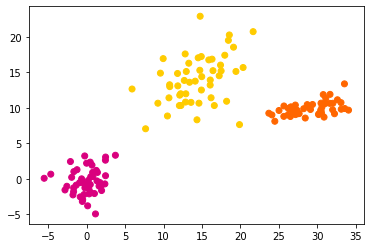

In [79]:
colors_map = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']
colors_fn = np.vectorize(lambda x: colors_map[x])
colors = colors_fn(clusters)

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.show()

In [80]:
from scipy.cluster.hierarchy import fclusterdata

In [81]:
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], 
                            size=pts)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=pts)
c = rng.multivariate_normal([15, 15],
                            [[5, 8], [10, 3]],
                            size=pts)
X = np.concatenate((a, b, c))

C:\Users\Thanh\.conda\envs\tensorflow2_gpu_p36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  


In [94]:
clusters = fclusterdata(X, t=6, criterion='distance')

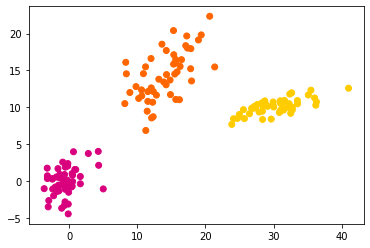

In [95]:
colors_map = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']
colors_fn = np.vectorize(lambda x: colors_map[x])
colors = colors_fn(clusters)

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.show()

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], 
                            size=10)
b = rng.multivariate_normal([30, 10],
                            [[10, 2], [2, 1]],
                            size=10)
c = rng.multivariate_normal([15, 15],
                            [[5, 8], [10, 3]],
                            size=10)
X = np.concatenate((a, b, c))

C:\Users\Thanh\.conda\envs\tensorflow2_gpu_p36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.


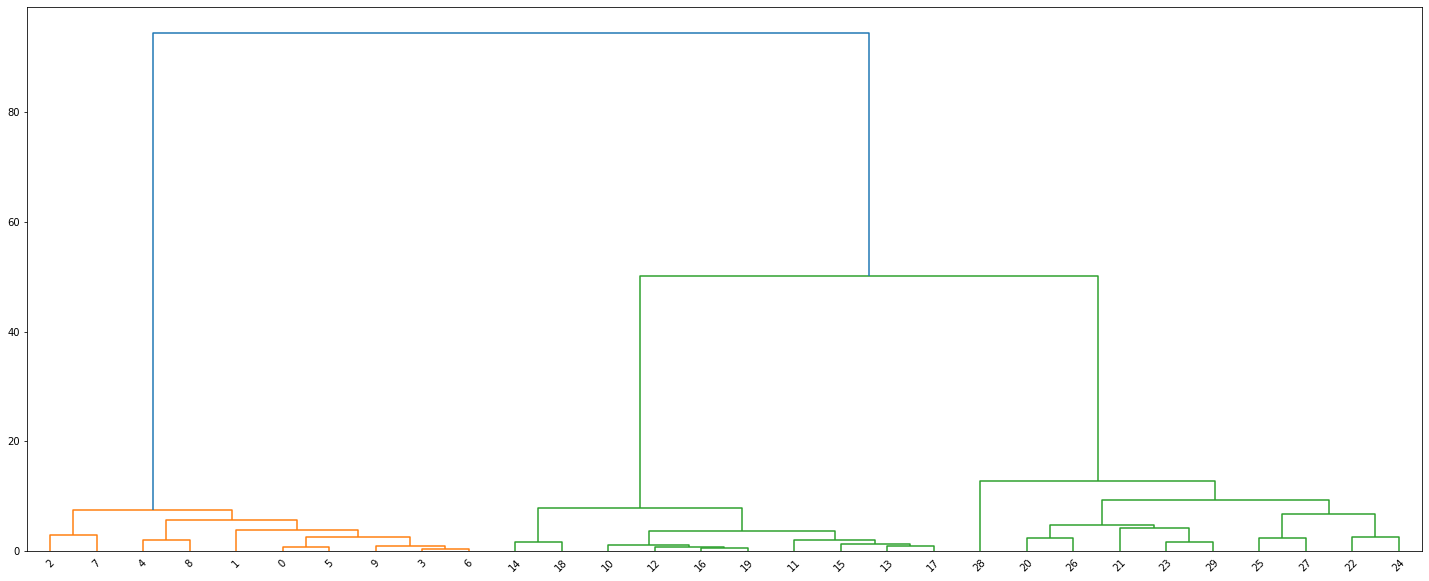

In [102]:
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

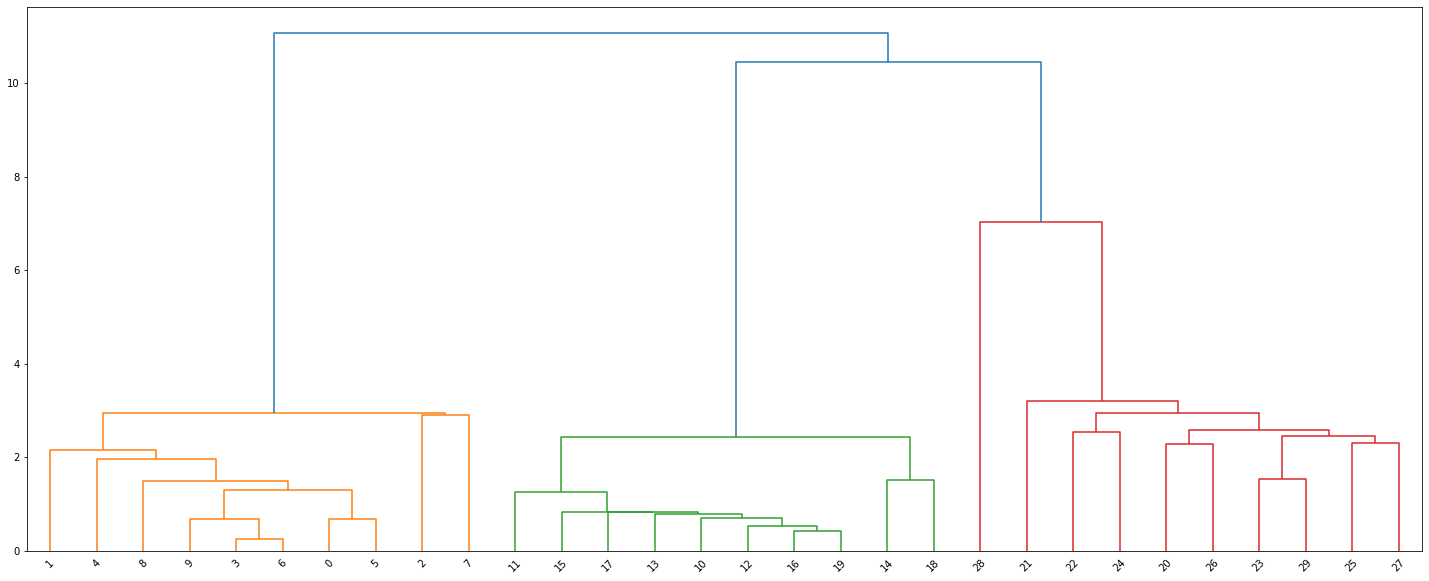

In [103]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()